<a href="https://colab.research.google.com/github/web2webs/labs/blob/main/Tabular%20SARSA%20lambda%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot

In [64]:
# generate random value array with source and destination, and size map_size by map_size

map_size = 30
destination = torch.tensor([int(map_size/2),int(map_size/2)]) #np.random.random_integers(0, map_size-1, 2)

reward_map = torch.full((map_size, map_size), -1)

BSFD = []
BSFD += [[-3,j] for j in range(-3, 5)]
BSFD += [[j,-3] for j in range(-3, 5)]
print(BSFD)
reward_map[destination[0]][destination[1]] = 50
for p in BSFD:
    reward_map[destination[0] + p[0]][destination[1] + p[1]] = -100


[[-3, -3], [-3, -2], [-3, -1], [-3, 0], [-3, 1], [-3, 2], [-3, 3], [-3, 4], [-3, -3], [-2, -3], [-1, -3], [0, -3], [1, -3], [2, -3], [3, -3], [4, -3]]


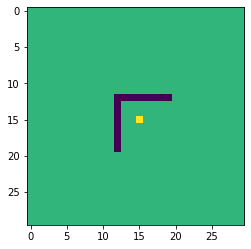

In [65]:
fig, ax = pyplot.subplots()
im = ax.imshow(reward_map)

In [66]:
number_actions = 4
Q = torch.rand((map_size, map_size, number_actions)) #np.zeros((map_size, map_size, number_actions)) #

Actions = torch.tensor([[0, -1], [0, 1],[-1, 0],[1, 0]]) # np.array([[1, 0], [0, 1]]) #
eps = 0.1 # not following strategy probability, exploration rate
gamma = 0.9 # discount factor
alpha = 0.1 # learning rate
l = 0.1 # TD learning parameter

try:
    means.shape
    del means
    del vars
    del cumm_reward
except:
    print("means not created")

#stats = torch.empty((2,1)) #[[], []]
for i in tqdm(range(1000)):
    #print ("iteration: ", i)
    # initialize the ET (elegibility traces) matrix with zerose
    ET = torch.zeros((map_size, map_size, number_actions))
    deltas = torch.empty((1,))#[]
    while True:
        # select starting state
        S = torch.randint(0, map_size-1, (2,))
        if (destination != S).all():
            break
    # select random starting action
    action_arg = torch.randint(0,number_actions,(1,))
    action = Actions[action_arg][0]
    cum_r = 0
    while (destination != S).any():
        # take action A in state S to move to next state new_S
        new_S = (S + action + map_size)%map_size
        #print("New S: ", new_S)
        """
        if (destination == new_S).all() :
            reward = 5
        else:
            reward = -1
        """
        reward = reward_map[new_S[0], new_S[1]]
        
        cum_r+=reward
        # Select the best action in new_state following the Q function and the epsilon gredy strategy 
        #from_Q = np.random.choice([True, False], p= [1-eps, eps])
        from_Q = torch.bernoulli(torch.tensor([1-eps])).any()
        
        if from_Q:
            
            new_action_arg = torch.argmax(Q[new_S[0], new_S[1]])
            #print("\n A: ", new_action_arg)
        else:
            new_action_arg = torch.randint(0,number_actions,(1,))[0]
            #print("\n B: ", new_action_arg)
        #print("New action arg: ", new_action_arg)
        #print("S: ", S)
        #print("Action arg: ", action_arg)
        new_action = Actions[new_action_arg]
        
        delta = reward + gamma * Q[new_S[0], new_S[1], new_action_arg ] - Q[S[0], S[1], action_arg ]
        #deltas.append(delta)
        deltas = torch.cat([deltas, delta ])

        # increment state in ET (accumulating traces technique )

        #ET[S[0], S[1], action_arg ] +=1
        ET[S[0], S[1], action_arg ] = 1
        # Update Q function
        Q = Q + alpha*delta*ET
        # Update ET matrix
        ET = l*gamma*ET

        S = new_S
        action = new_action
        #print("\n ", action)
        action_arg = torch.argwhere((Actions == action).all(axis=1))[0]
    mean_delta = torch.mean(deltas)
    var_delta = torch.var(deltas)
    
    
    try:
        means = torch.cat([means, torch.tensor([mean_delta])]) 
        vars = torch.cat([vars, torch.tensor([var_delta])]) 
        cumm_reward = torch.cat([cumm_reward, torch.tensor([cum_r])]) 
    except:
        means = torch.tensor([mean_delta])
        vars = torch.tensor([var_delta])
        cumm_reward = torch.tensor([cum_r])

    #print(torch.cat([stats[0], torch.tensor([mean_delta])]))
    #stats = torch.tensor([  torch.cat([stats[0], torch.tensor([mean_delta])]),
                          #torch.cat([stats[1], torch.tensor([var_delta])])   ])

    #try:
    #    stats = torch.tensor([torch.cat([stats[0], torch.tensor(mean_delta)]), torch.cat([stats[1], torch.tensor(var_delta)])])
    #except:
    #    stats = torch.tensor([[mean_delta], [var_delta]])
    #stats[0].append(mean_delta)
    #stats[1].append(var_delta)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?it/s]

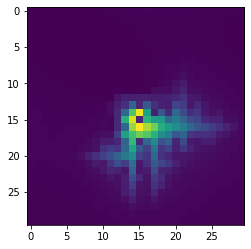

In [67]:
fig, ax = pyplot.subplots()
im = ax.imshow(torch.max(Q, axis=2).values)

In [ ]:
cumm_reward

tensor([-2897,  -443,   -93,  -752, -1243,  -314,  -637,  -436,   -87, -1380,
         -889,  -416,  -321,  -407,  -234,  -374,  -332, -1006,  -457,   -67,
         -141,     0,  -222, -1578,   -41,  -369,  -438,   -68,  -243,  -104,
         -154, -1195,   -63,  -568,  -462,  -584,    -2,  -536,  -195,   -93,
          -24,  -182,  -150,   -47,  -272,  -330,    -3,   -53,  -473, -1019,
         -822,  -164,     1,   -61,   -56,  -559,  -563,  -263,  -117,  -214,
         -435,   -55,  -213,   -53,  -188,  -347,    -6,  -330,   -72,  -703,
         -487,   -47,   -35,  -292,   -48,  -307,     0,   -45,  -290,     2,
          -92,  -108,  -470,  -777,  -163,   -17,  -131,  -336,  -172,  -249,
          -27,   -12,  -451,  -352,  -104,  -408,  -352,   -63,   -59,  -343])

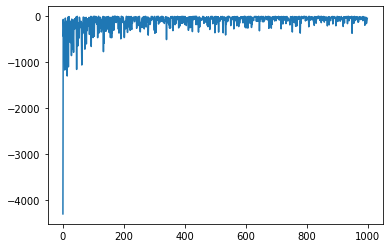

In [ ]:
pyplot.plot(cumm_reward)

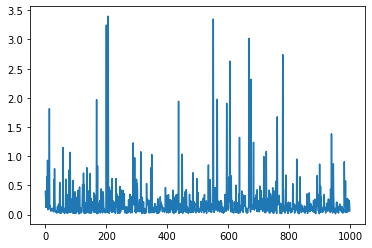

In [ ]:
pyplot.plot(vars)